## Importando Bibliotecas usada no problema

In [27]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report

## Ajustando configurações de plot

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [10, 5], 
          'axes.labelsize': 10,
          'axes.titlesize':14, 
          'font.size': 10,
          'legend.fontsize': 10, 
          'xtick.labelsize': 8, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

## 6

#### $\mu_1 = [0, 0]$
#### $\mu_2 = [0, 4]$
#### $\sum_1 = \begin{bmatrix}
24 & 0 \\
0 & 1
\end{bmatrix}$
#### $\sum_2 = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$
#### $P(\omega_1) = P(\omega_2) = \frac{1}{2} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -\frac{23}{24}x_1^2 + 8x_2 -12.82 > 0\\
       \omega_2 & C.C\\
     \end{cases}$

### Gerando gráfico das distribuições normais bivariadas

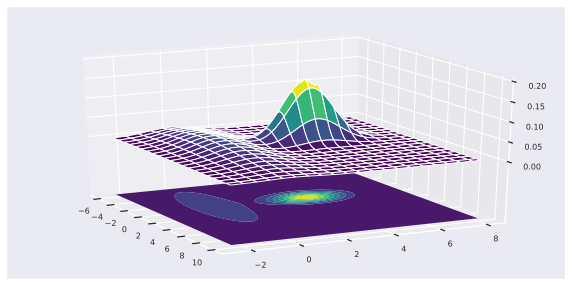

In [29]:
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-6, 10, N)
Y = np.linspace(-2.5, 8, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu1 = np.array([0., 0.])
Sigma1 = np.array([[ 24. , 0.], [0.,  1.]])

# Mean vector and covariance matrix
mu2 = np.array([0., 4.])
Sigma2 = np.array([[ 1. , 0.], [0.,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu1, Sigma1) + multivariate_gaussian(pos, mu2, Sigma2)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(22, -27)

plt.show()

## Função para classificação

In [30]:
## Classificador
def bayesanClassifier(X1, X2, coef):
    results = []
    for x1, x2 in zip(X1, X2):
        value = coef[0]*x1*x1 + coef[1]*x2 + coef[2]
        if value < 0:
            results.append(0)
        else:
            results.append(1)
    return results

## Gerando Amostras de n = 1000 para as distribuições normais bivariada

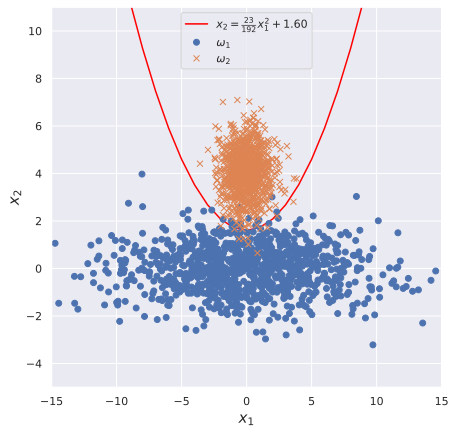

In [36]:
mean1 = [0, 0]
cov1 = [[24., 0], [0, 1]]
x, y = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [0, 4]
cov2 = [[1, 0], [0, 1]]
w, z = np.random.multivariate_normal(mean2, cov2, 1000).T

#equação da reta
x1= np.arange(-15,15,1)
x2 = ((23/192.)*x1*x1 + 1.60)

X1 = np.concatenate((x, w), axis=None)
X2 = np.concatenate((y, z), axis=None)

class1 = np.full(1000, 0)
class2 = np.full(1000, 1)
CLASS =  np.concatenate((class1, class2), axis=None)

coef = [-23/24., 8., -12.82]

plt.figure(figsize=(7,7))
plt.plot(x1,x2, color = 'red', label = r'$x_2= \frac{23}{192}x_1^2 +1.60$')
plt.plot(x, y, 'o', label = r'$\omega_1$')
plt.plot(w, z, 'x', label = r'$\omega_2$')
plt.xlabel(r'$x_{1}$', fontsize = 15)
plt.ylabel(r'$x_{2}$', fontsize = 15)
plt.xlim(-15,15)
plt.ylim(-5,11)
plt.legend()
#plt.axis('equal')
plt.show()

## Função para a Classificação

In [37]:
results = bayesanClassifier(X1, X2, coef)

## Matriz de confusão

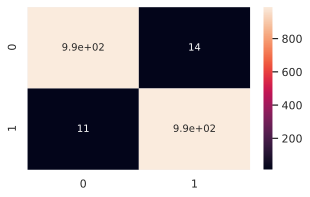

In [38]:
matrix = confusion_matrix(CLASS, results)
import seaborn as sn
df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize=(5,3))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size

plt.show()

## Métricas

In [39]:
target_names = ['Classe 1', 'Classe 2']
##Calculando os erros
erros = 0
for i in range(0, 1000):
    if results[i] != CLASS[i]:
        erros += 1


print(classification_report(CLASS, results, target_names=target_names))
print('Erro:', ((erros)/1000)*100, '%' )

              precision    recall  f1-score   support

    Classe 1       0.99      0.99      0.99      1000
    Classe 2       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Erro: 1.4000000000000001 %


## [5d] item b


#### $\mu_1 = [4, 7]$
#### $\mu_1 = [8, 0]$
#### $\sum_1 = \sum_2 = \sum = I =  \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}$
#### $P(\omega_1) = \frac{1}{3}$ 
#### $P(\omega_2) = \frac{2}{3} $
#### $d(X) = 
     \begin{cases}
       \omega_1, & -4x_1 + 7x_2 -1.193 > 0\\
       \omega_2 & C.C\\
     \end{cases}$